In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2 as cv
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os
from matplotlib import pyplot as plt

In [ ]:
dir= "/content/drive/My Drive/77_faces"
width = height = 224
batch_size = 32

data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True,
    # vertical_flip=True,
    brightness_range=(0.8, 1.2),
    # shear_range=0.1,
    # zoom_range=0.2,
    fill_mode='reflect',
    # preprocessing_function=face_detector,
    validation_split=0.1)

train_data = data_generator.flow_from_directory(
    dir,
    target_size=(width, height),
    class_mode='categorical', 
    batch_size=batch_size,
    subset='training',
    shuffle=True
)

val_data = data_generator.flow_from_directory(
    dir,
    target_size=(width, height),
    class_mode='categorical', 
    batch_size=batch_size,
    subset='validation',
    shuffle=True
)

Found 1140 images belonging to 14 classes.
Found 118 images belonging to 14 classes.


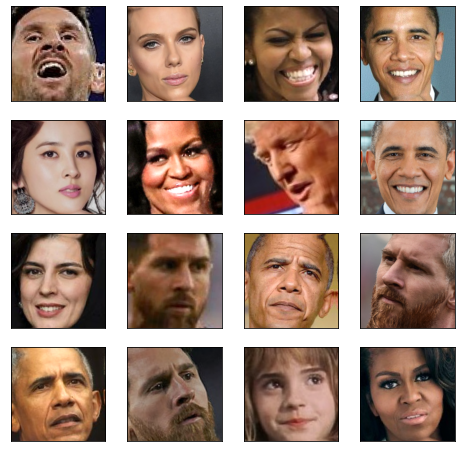

In [ ]:
train_images = next(train_data)[0]
plt.figure(figsize=(8,8)) # plot 25 images

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)

In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(width, height, 3),
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling='avg'
)

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers[:-4]:
    layer.trainable = False

In [ ]:
base_model.summary()

In [ ]:
model = tf.keras.Sequential([
    base_model,
    # layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_data.num_classes, activation='softmax')
])

In [ ]:
model = tf.keras.models.load_model('/content/drive/My Drive/saved_model')

In [ ]:
model.summary()

In [ ]:
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
    # optimizer=tf.keras.optimizers.Adam(),
    # optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.0001),
    metrics='accuracy'
)

In [ ]:
#train
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // batch_size,
    validation_data=val_data,
    validation_steps=val_data.samples // batch_size,
    epochs=64,
    shuffle=True
)

Epoch 1/64
35/35 [==============================] - 312s 9s/step - loss: 2.3987 - accuracy: 0.2428 - val_loss: 2.2965 - val_accuracy: 0.2188
Epoch 2/64
35/35 [==============================] - 17s 500ms/step - loss: 1.5357 - accuracy: 0.5442 - val_loss: 1.8873 - val_accuracy: 0.3750
Epoch 3/64
35/35 [==============================] - 17s 500ms/step - loss: 1.1951 - accuracy: 0.6498 - val_loss: 2.1113 - val_accuracy: 0.3854
Epoch 4/64
35/35 [==============================] - 17s 493ms/step - loss: 0.9824 - accuracy: 0.7085 - val_loss: 2.1681 - val_accuracy: 0.4375
Epoch 5/64
35/35 [==============================] - 17s 491ms/step - loss: 0.7822 - accuracy: 0.7789 - val_loss: 1.9116 - val_accuracy: 0.4375
Epoch 6/64
35/35 [==============================] - 17s 489ms/step - loss: 0.6964 - accuracy: 0.7915 - val_loss: 1.7418 - val_accuracy: 0.5208
Epoch 7/64
35/35 [==============================] - 18s 503ms/step - loss: 0.5675 - accuracy: 0.8448 - val_loss: 2.0602 - val_accuracy: 0.5104
E

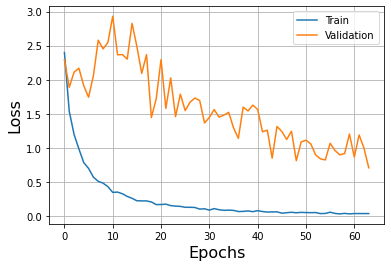

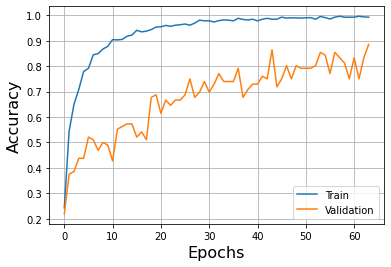

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label="Train")
plt.plot(history.history['val_loss'], label="Validation")
plt.legend(loc='best')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.grid()
plt.show()

plt.plot(history.history['accuracy'], label="Train")
plt.plot(history.history['val_accuracy'], label="Validation")
plt.legend(loc='best')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.grid()
plt.show()

In [ ]:
score = model.evaluate(val_data)
print(score)

11/11 [==============================] - 3s 241ms/step - loss: 0.0159 - accuracy: 0.8698
[0.015910880640149117, 0.8698225021362305]


In [ ]:
model.save('/content/drive/My Drive/saved_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/saved_model/assets


In [ ]:
import urllib.request

image_url = 'https://s.france24.com/media/display/a89f55a2-abff-11ea-b263-005056bff430/w:1280/p:16x9/2020-06-10T224534Z_26952549_RC2K6H9AXPGB_RTRMADP_3_MINNEAPOLIS-POLICE-TRUMP.webp'
urllib.request.urlretrieve(image_url, 'person.jpg')

('person.jpg', <http.client.HTTPMessage at 0x7f9bf092c278>)

In [ ]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 8.3MB/s 


[515, 51, 182, 217]
{'left_eye': (585, 133), 'right_eye': (664, 132), 'nose': (636, 163), 'mouth_left': (595, 217), 'mouth_right': (665, 216)}


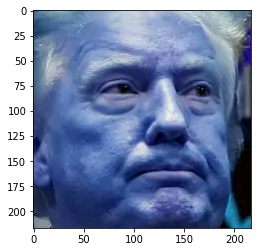

In [ ]:
from mtcnn.mtcnn import MTCNN
import cv2

detector = MTCNN()

image = cv2.imread("person.jpg")
result = detector.detect_faces(image)
# That's it - the results have already been generated! Now we extract the boundaries that have been identified 
bounding_box = result[0]['box']
keypoints = result[0]['keypoints']

print(bounding_box)
print(keypoints)

x = bounding_box[0]
y = bounding_box[1]
w = bounding_box[2]
h = bounding_box[3]

a = max(w, h)
center_x = x + w//2
center_y = y + h//2

x = center_x - a//2
y = center_y - a//2

img_face = image[y:y+a, x:x+a]

plt.imshow(img_face)

In [ ]:
import cv2 as cv

# img = cv2.imread("person.jpg")
img = img_face
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, (224, 224))
img = img / 255.0
img = img.reshape(1, 224, 224, 3)

output = model.predict(img)
print(output)
print('probability', np.max(output))
print('class index', np.argmax(output))

labels = list(train_data.class_indices.keys())
print('class label', labels[np.argmax(output)])

[[2.4891206e-06 1.4356194e-06 1.0634953e-04 9.9237740e-01 1.7585677e-05
  4.4204459e-08 1.0157568e-04 1.7895553e-07 5.4407259e-03 1.1408550e-06
  4.7022368e-05 4.9628824e-04 3.1837262e-05 1.3759057e-03]]
probability 0.9923774
class index 3
class label Donald-Trump


In [ ]:
labels = list(train_data.class_indices.keys())
print(labels)

['Ali-Khamenei', 'Angelina-Jolie', 'Barak-Obama', 'Donald-Trump', 'Emma-Watson', 'Han-Hye-Jin', 'Kim-Jong-Un', 'Leyla-Hatami', 'Lionel-Messi', 'Michelle-Obama', 'Morgan-Freeman', 'Queen-Elizabeth', 'Scarlett-Johansson', 'Vladimir-Putin']
